In [1]:
# LOADING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from xgboost.sklearn import XGBRegressor

import lightgbm
from lightgbm import LGBMRegressor

from yellowbrick.cluster import KElbowVisualizer

import time

import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Stores.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
# Overview of dataset
df.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
df.tail()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_ID,896.0,448.500000,258.797218,1.0,224.75,448.5,672.25,896.0
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


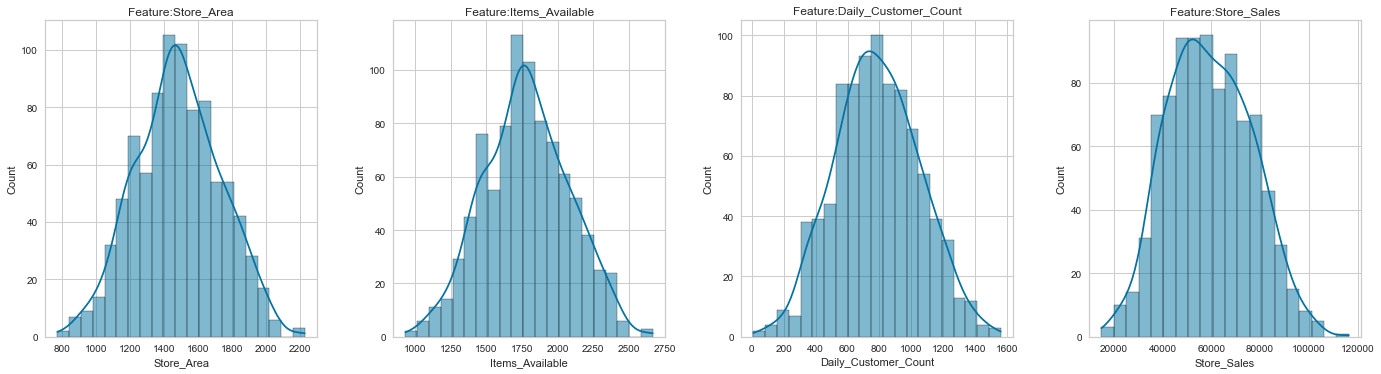

In [7]:
# EXTRAPOLATORY DATA ANALYSIS

fig, axs = plt.subplots(1, 4, figsize=(20,6))
fig.tight_layout(pad=4.0)

features = ['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales']

for f,ax in zip(features,axs.ravel()):
    ax=sns.histplot(ax=ax,data=df,x=df[f],kde=True)
    ax.set_title('Feature:'+ f)

In [8]:
# Check skew and kurtosis
cols = df.columns
for i in cols:
    
    # Skew and kurt
    print('Column Name : ', i)
    print("Skewness: %f" % df[i].skew())
    print("Kurtosis: %f" % df[i].kurt())

Column Name :  Store_ID
Skewness: 0.000000
Kurtosis: -1.200000
Column Name :  Store_Area
Skewness: 0.030367
Kurtosis: -0.282545
Column Name :  Items_Available
Skewness: 0.034439
Kurtosis: -0.281090
Column Name :  Daily_Customer_Count
Skewness: 0.074633
Kurtosis: -0.259751
Column Name :  Store_Sales
Skewness: 0.148794
Kurtosis: -0.456116


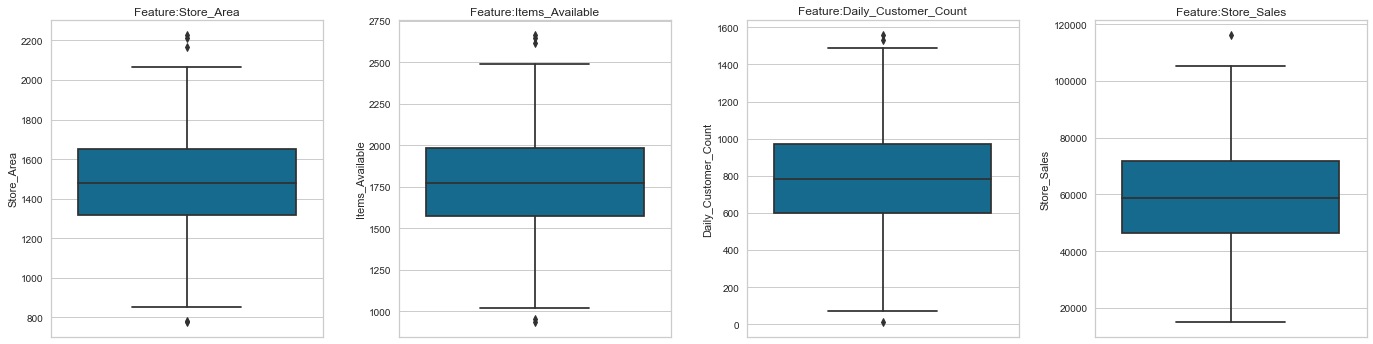

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20,6))
fig.tight_layout(pad=4.0)

for f,ax in zip(features,axs.ravel()):
    ax=sns.boxplot(ax=ax,data=df,y=df[f])
    ax.set_title('Feature:'+ f)

In [10]:
# Set max threshold as 99% percentile
max_threshold = df['Store_Sales'].quantile(0.99)
max_threshold

98320.99999999994

In [11]:
# how far is the maximum value as compared to the 99% percentile
df['Store_Sales'].max() / max_threshold * 100

118.3063638490252

In [12]:
df[df['Store_Sales']>max_threshold]

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
166,167,1465,1763,680,99570
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
692,693,1548,1858,480,99480
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


In [13]:
# Set min threshold as 1% percentile
min_threshold = df['Store_Sales'].quantile(0.01)
min_threshold

22286.0

In [14]:
df[df['Store_Sales']<min_threshold]

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920
252,253,1583,1907,680,21830
277,278,1572,1869,1030,21750
352,353,1397,1686,850,21300
372,373,1876,2254,1340,21650
593,594,1624,1946,870,20270
725,726,1445,1734,900,21470
775,776,1537,1877,660,17670
852,853,1477,1790,880,16370


In [15]:
# how far is the maximum value as compared to the 99% percentile
df['Store_Sales'].min() / min_threshold * 100

66.9478596428251

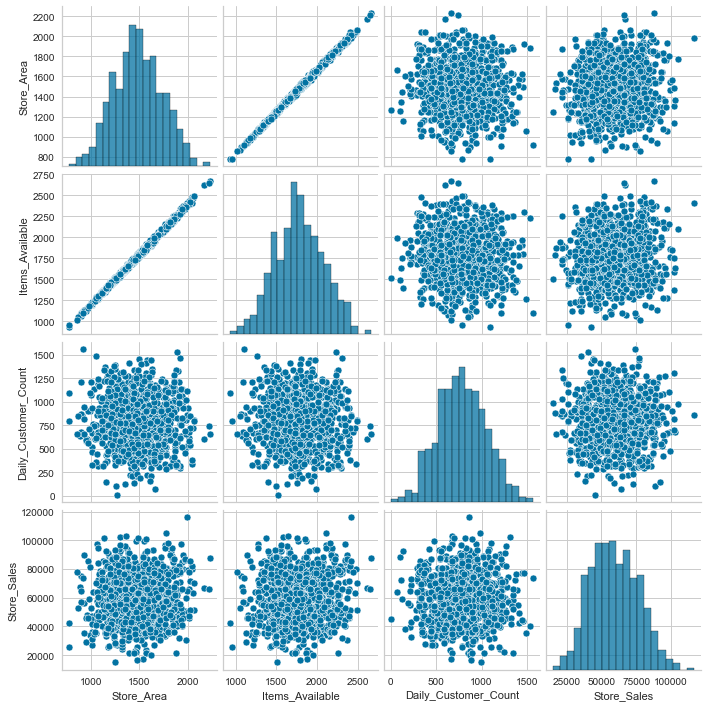

In [16]:
df_drop_id = df[features]
sns.pairplot(df_drop_id)

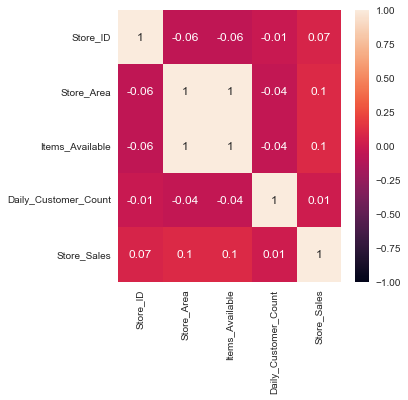

In [17]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(df.corr().round(2),vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='Store_Sales', ylabel='Items_Available'>

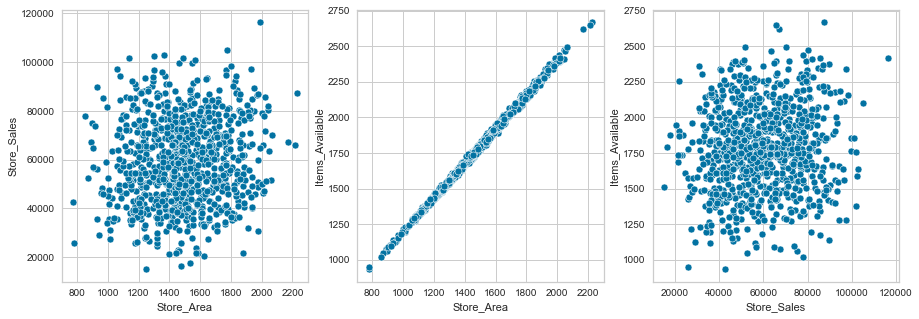

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.subplots_adjust(wspace=0.2)

sns.scatterplot(data=df, x=df["Store_Area"], y=df['Store_Sales'], ax=ax1)
sns.scatterplot(data=df, x=df["Store_Area"], y=df['Items_Available'], ax=ax2)
sns.scatterplot(data=df, x=df["Store_Sales"], y=df['Items_Available'], ax=ax3)

In [19]:
df.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [20]:
# # Top 10 STORES WITH HIGHEST MONTHLY SALES
top_stores = df.sort_values('Store_Sales', ascending=False)[:10]

In [21]:
top_stores

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [22]:
top_stores['Store_ID'] = top_stores.index
top_stores

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,649,1989,2414,860,116320
868,868,1775,2104,980,105150
432,432,1365,1638,680,102920
408,408,1303,1587,1310,102310
758,758,1486,1758,820,101820
557,557,1137,1374,700,101780
866,866,1565,1854,900,100900
166,166,1465,1763,680,99570
692,692,1548,1858,480,99480
871,871,1800,2158,1100,98260


In [23]:
sort_order=top_stores.sort_values('Store_Sales', ascending=False)[:10]['Store_ID']
sort_order

649    649
868    868
432    432
408    408
758    758
557    557
866    866
166    166
692    692
871    871
Name: Store_ID, dtype: int64

In [24]:
# Order for daily customer counts
cust_order=top_stores.sort_values('Daily_Customer_Count', ascending=False)[:10]['Store_ID']
cust_order

408    408
871    871
868    868
866    866
649    649
758    758
557    557
432    432
166    166
692    692
Name: Store_ID, dtype: int64

In [25]:
# ZOOMING BEYOND PAIRPLOTS as we cannot tell much from the rest of the features apart from Store_Area and Items_Available 

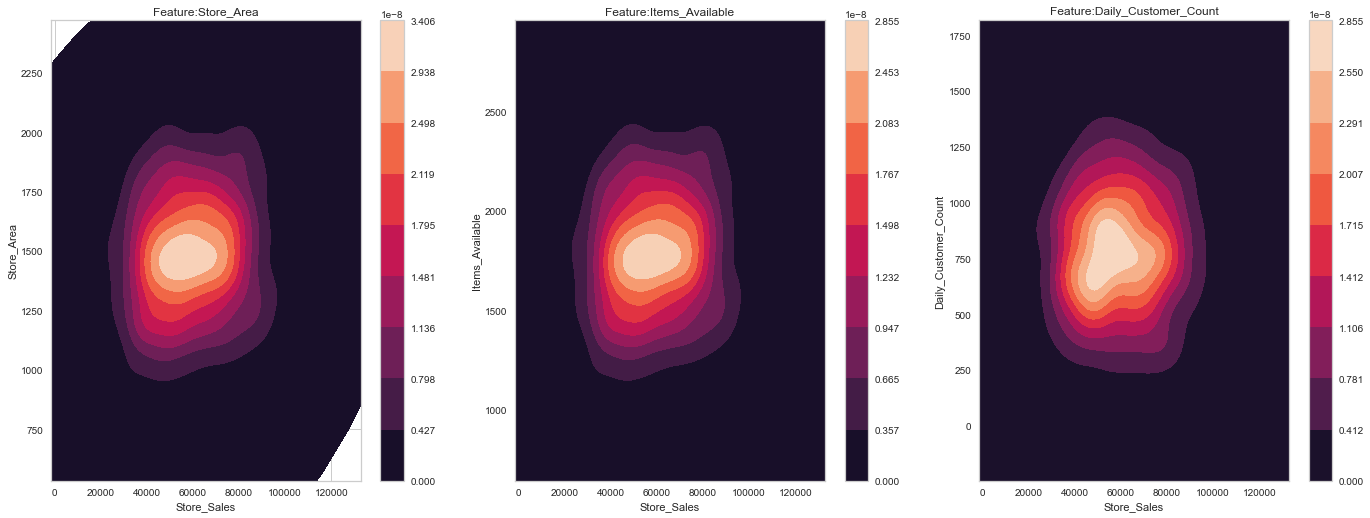

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))
fig.tight_layout(pad=4.0)

for f,ax in zip(features,axs.ravel()):
    ax=sns.kdeplot(ax=ax,data=df,y=df[f], x=df.Store_Sales,cmap="rocket", shade=True, thresh=0,cbar=True)
    
    ax.set_title('Feature:'+ f)

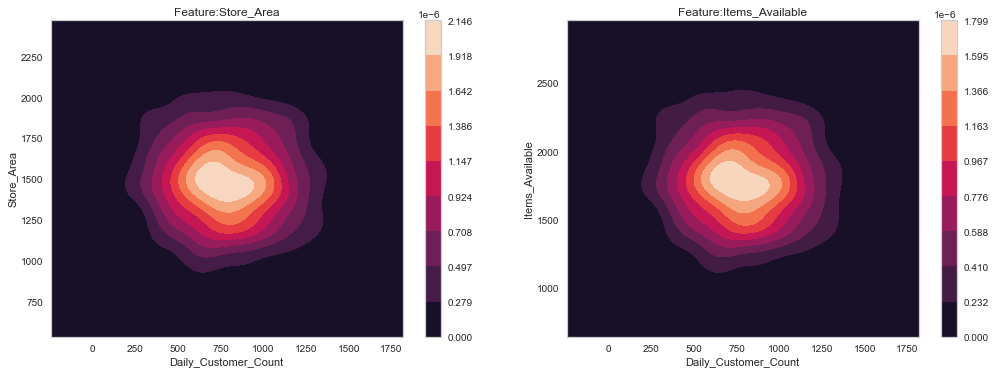

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.tight_layout(pad=4.0)

for f,ax in zip(features,axs.ravel()):
    ax=sns.kdeplot(ax=ax,data=df,y=df[f], x=df.Daily_Customer_Count,cmap="rocket", shade=True, thresh=0,cbar=True)
    ax.set_title('Feature:'+ f)

Text(0.5, 1.0, 'Top 10 Stores with Highest Monthly Customer Counts')

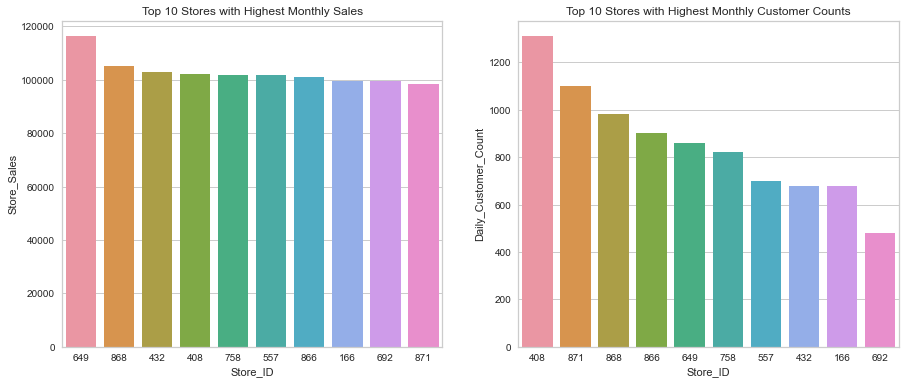

In [28]:
# Top 10 STORES WITH HIGHEST MONTHLY SALES
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.subplots_adjust(wspace=0.2)

sns.barplot(data=top_stores, x="Store_ID", y="Store_Sales", order=sort_order, ax=ax1).set_title('Top 10 Stores with Highest Monthly Sales')
sns.barplot(data=top_stores, x="Store_ID", y="Daily_Customer_Count", order=cust_order).set_title('Top 10 Stores with Highest Monthly Customer Counts')

In [29]:
# Additional Columns to normalised based on customer base and temporal dimensions
df2 = df.copy()
df2['total_monthly_customers_count'] = df2['Daily_Customer_Count'] * 30
df2['avg_customer_spend_day'] = df2['Store_Sales'] / df2['total_monthly_customers_count']
df2['avg_customer_spend_month'] = df2['Store_Sales'] / df2['Daily_Customer_Count']
df2['avg_daily_sales'] = df2['Store_Sales'] / 30

In [30]:
df2.head(3)

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_daily_sales
0,1,1659,1961,530,66490,15900,4.181761,125.452830,2216.333333
1,2,1461,1752,210,39820,6300,6.320635,189.619048,1327.333333
2,3,1340,1609,720,54010,21600,2.500463,75.013889,1800.333333


In [31]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_ID,896.0,448.500000,258.797218,1.000000,224.750000,448.500000,672.250000,896.000000
Store_Area,896.0,1485.409598,250.237011,775.000000,1316.750000,1477.000000,1653.500000,2229.000000
Items_Available,896.0,1782.035714,299.872053,932.000000,1575.500000,1773.500000,1982.750000,2667.000000
Daily_Customer_Count,896.0,786.350446,265.389281,10.000000,600.000000,780.000000,970.000000,1560.000000
Store_Sales,896.0,59351.305804,17190.741895,14920.000000,46530.000000,58605.000000,71872.500000,116320.000000
total_monthly_customers_count,896.0,23590.513393,7961.678423,300.000000,18000.000000,23400.000000,29100.000000,46800.000000
avg_customer_spend_day,896.0,3.134772,5.427303,0.502357,1.862519,2.513641,3.428444,151.600000
avg_customer_spend_month,896.0,94.043175,162.819099,15.070707,55.875573,75.409239,102.853319,4548.000000
avg_daily_sales,896.0,1978.376860,573.024730,497.333333,1551.000000,1953.500000,2395.750000,3877.333333


<AxesSubplot:xlabel='avg_daily_sales', ylabel='Count'>

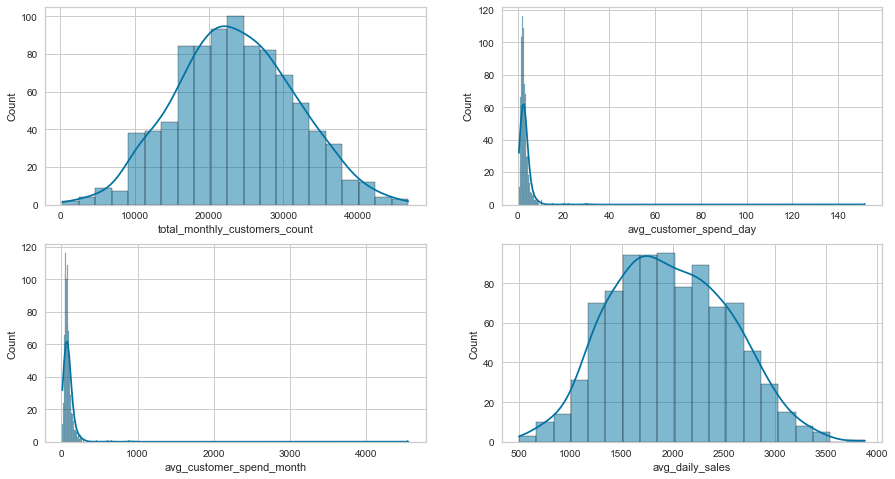

In [32]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.histplot(data=df2, x=df2["total_monthly_customers_count"], kde=True, ax=ax1, palette='Set2')
sns.histplot(data=df2, x=df2["avg_customer_spend_day"], kde=True, ax=ax2, palette='Set2')
sns.histplot(data=df2, x=df2["avg_customer_spend_month"], kde=True, ax=ax3, palette='Set2')
sns.histplot(data=df2, x=df2["avg_daily_sales"], kde=True, ax=ax4, palette='Set2')

In [33]:
# CORRELATION CALCULATION
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Store_ID                0.071486
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



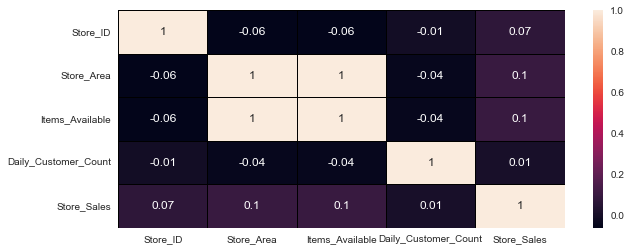

In [34]:
# Creating a heat map of all the numerical features.
plt.figure(figsize=(10,4))
mat = np.round(df.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black',annot=True);

### Outliers Detection

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_ID,896.0,448.500000,258.797218,1.0,224.75,448.5,672.25,896.0
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [37]:
## 

In [38]:
## 

In [30]:
df2.head(3)

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_daily_sales
0,1,1659,1961,530,66490,15900,4.181761,125.452830,2216.333333
1,2,1461,1752,210,39820,6300,6.320635,189.619048,1327.333333
2,3,1340,1609,720,54010,21600,2.500463,75.013889,1800.333333


### More EDA

In [42]:
# Let's breakdown the database by floor space area:
df2['Store_Area_Cluster'] = pd.qcut(df['Store_Area'],10)
df2.groupby('Store_Area_Cluster').agg(['mean'])

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact
,mean,mean,mean,mean,mean,mean
Store_Area_Cluster,,,,,,
"(774.999, 1165.0]",483.252874,1066.896552,1280.988506,791.379310,57323.218391,1.0
"(1165.0, 1252.0]",488.431818,1212.511364,1457.511364,817.727273,56687.159091,1.0
"(1252.0, 1359.0]",437.842697,1312.584270,1572.370787,782.584270,59658.202247,1.0
"(1359.0, 1429.0]",436.855556,1394.588889,1674.277778,776.666667,59323.666667,1.0
"(1429.0, 1477.0]",428.044944,1452.235955,1742.966292,785.393258,58465.280899,1.0
"(1477.0, 1539.0]",473.125000,1508.931818,1809.352273,780.340909,59036.136364,1.0
"(1539.0, 1614.5]",471.539326,1576.966292,1890.483146,790.000000,59462.022472,1.0
"(1614.5, 1703.0]",433.411111,1655.311111,1986.555556,765.111111,60812.888889,1.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Store_Area_Cluster'] = le.fit_transform(df2['Store_Area_Cluster'])
df2['Store_Area_Cluster']

0      7
1      4
2      2
3      4
4      8
      ..
891    6
892    3
893    1
894    2
895    1
Name: Store_Area_Cluster, Length: 884, dtype: int32

In [44]:
df2.groupby('Store_Area_Cluster').agg(['mean'])

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact
,mean,mean,mean,mean,mean,mean
Store_Area_Cluster,,,,,,
0,483.252874,1066.896552,1280.988506,791.379310,57323.218391,1.0
1,488.431818,1212.511364,1457.511364,817.727273,56687.159091,1.0
2,437.842697,1312.584270,1572.370787,782.584270,59658.202247,1.0
3,436.855556,1394.588889,1674.277778,776.666667,59323.666667,1.0
4,428.044944,1452.235955,1742.966292,785.393258,58465.280899,1.0
5,473.125000,1508.931818,1809.352273,780.340909,59036.136364,1.0
6,471.539326,1576.966292,1890.483146,790.000000,59462.022472,1.0
7,433.411111,1655.311111,1986.555556,765.111111,60812.888889,1.0


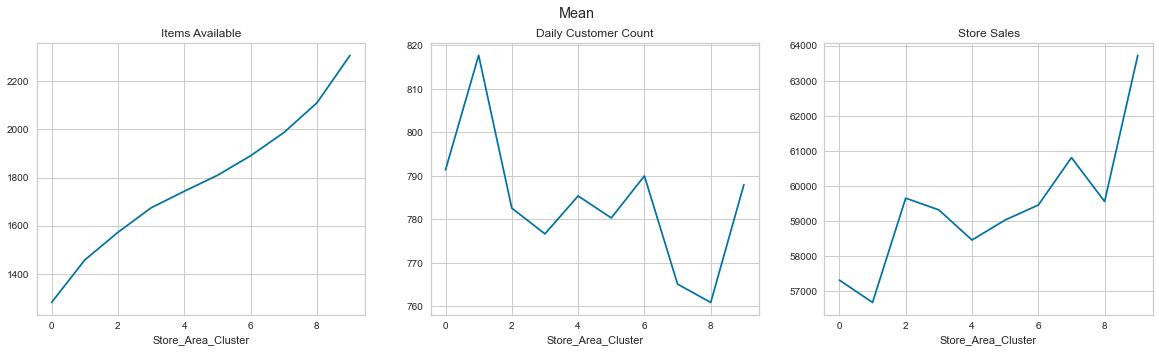

In [45]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('Mean')
df2.groupby('Store_Area_Cluster')['Items_Available'].mean().plot(ax=axs[0], title='Items Available')
df2.groupby('Store_Area_Cluster')['Daily_Customer_Count'].mean().plot(ax = axs[1], title='Daily Customer Count')
df2.groupby('Store_Area_Cluster')['Store_Sales'].mean().plot(ax=axs[2], title='Store Sales')
plt.show()

In [46]:
# Point 1: Store_Area_Range 2 (Cluster 2) has the highest daily customer count but the lowest store sales. WHY?
store1 = df2.copy()
store2 = store1[store1['Store_Area_Cluster']==2]

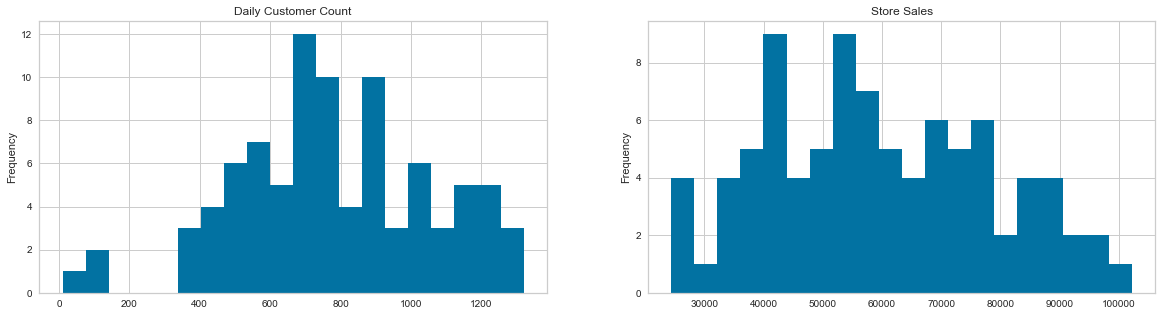

In [47]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
store2['Daily_Customer_Count'].plot.hist(bins=20, ax=axs[0], title='Daily Customer Count')
store2['Store_Sales'].plot.hist(bins=20, ax=axs[1], title='Store Sales')
plt.show()

In [48]:
# Let see the highest and lowest Store Sales from this range
store2[(store2['Store_Sales']<26000)|(store2['Store_Sales']>100000)]

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact,Store_Area_Cluster
223,224,1318,1606,1200,24410,1,2
272,273,1319,1571,1190,25630,1,2
408,409,1303,1587,1310,102310,1,2


In [49]:
# Let see the highest and lowest Daily Customer Count from this range
store2[(store2['Daily_Customer_Count']==store2['Daily_Customer_Count'].min())|(store2['Daily_Customer_Count']==store2['Daily_Customer_Count'].max())]

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact,Store_Area_Cluster
39,40,1270,1516,10,45480,1,2
834,835,1327,1609,1320,41500,1,2


In [50]:
# Compute average spend per customer
# Let's assume if all the customer who come to store must buy a goods, how much do they spend on average
df2['avg_purchase'] = df2['Store_Sales'] / df2['Daily_Customer_Count']
df2.groupby('Store_Area_Cluster').agg({'Daily_Customer_Count':np.sum, 'avg_purchase':np.mean})

,Daily_Customer_Count,avg_purchase
Store_Area_Cluster,,
0,68850,86.350562
1,71960,76.398401
2,69650,146.929870
3,69900,86.293359
4,69900,91.035003
5,68670,85.601539
6,70310,86.562314
7,68860,101.072862
8,67720,87.667138


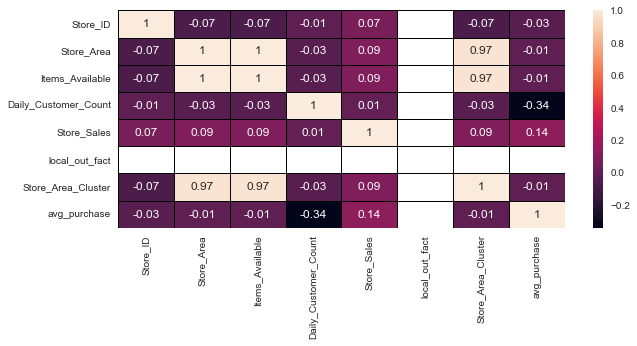

In [51]:
# Creating a heat map of all the numerical features.
plt.figure(figsize=(10,4))
mat = np.round(df2.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black',annot=True);

### Train Test Split 

In [52]:
# PREPARING TRAIN AND TEST

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 895
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_ID              884 non-null    int64  
 1   Store_Area            884 non-null    int64  
 2   Items_Available       884 non-null    int64  
 3   Daily_Customer_Count  884 non-null    int64  
 4   Store_Sales           884 non-null    int64  
 5   local_out_fact        884 non-null    int32  
 6   Store_Area_Cluster    884 non-null    int32  
 7   avg_purchase          884 non-null    float64
dtypes: float64(1), int32(2), int64(5)
memory usage: 55.2 KB


In [54]:
df2.describe()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact,Store_Area_Cluster,avg_purchase
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.0,884.000000,884.000000
mean,447.923077,1485.839367,1782.469457,783.710407,59395.950226,1.0,4.494344,94.423504
std,258.073630,245.958285,294.651077,263.633101,16983.876202,0.0,2.858888,163.792500
min,1.000000,780.000000,951.000000,10.000000,20270.000000,1.0,0.000000,16.156716
25%,224.750000,1317.750000,1578.250000,600.000000,46580.000000,1.0,2.000000,56.145600
50%,448.500000,1476.500000,1773.000000,770.000000,58605.000000,1.0,4.000000,75.591912
75%,670.250000,1651.250000,1982.000000,960.000000,71872.500000,1.0,7.000000,103.193834
max,896.000000,2229.000000,2667.000000,1530.000000,105150.000000,1.0,9.000000,4548.000000


In [55]:
X = df2.drop(['Store_Sales', 'avg_purchase'], axis=1)
y = df2[['Store_Sales']]

In [56]:
feature_name = X.columns
feature_name

Index(['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'local_out_fact', 'Store_Area_Cluster'],
      dtype='object')

In [57]:
X.head(3)

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,local_out_fact,Store_Area_Cluster
0,1,1659,1961,530,1,7
1,2,1461,1752,210,1,4
2,3,1340,1609,720,1,2


In [58]:
y.head(3)

,Store_Sales
0,66490
1,39820
2,54010


In [59]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= seed, shuffle=True)

In [60]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state= seed, shuffle=True)

In [61]:
# Standardise data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# PREDICTIONS WITHOUT KMEANS

### Modelling without Clustering

In [63]:
# base model definition

rf_reg = RandomForestRegressor(random_state=seed)
gb_reg = GradientBoostingRegressor(random_state=seed)
xgb_reg = XGBRegressor(random_state=seed)
lgbm_reg = LGBMRegressor(random_state=seed)

In [64]:
# Evaluating Test Model
results_df = pd.DataFrame()
reg_list = [rf_reg, gb_reg, xgb_reg, lgbm_reg]

for reg in reg_list:

    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    
    start_time = time.time()
    
    reg.fit(X_train,y_train)
    y_pred_no_cluster = reg.predict(X_test)
    
    end_time = time.time()
    
    # collate score dataframe
    # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
    score_df = pd.DataFrame({'MAE': mean_absolute_error(y_test, y_pred_no_cluster),
                             'MSE': mean_squared_error(y_test, y_pred_no_cluster), 
                             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_no_cluster)),
                             'R2': r2_score(y_test, y_pred_no_cluster),
                             'Eval_time': end_time - start_time,
                            }, 

    params_df = pd.concat([params_df], axis=1)
    results_df = pd.concat([results_df, params_df])

results_df.round(2)

,MAE,MSE,RMSE,R2,Eval_time
RandomForestRegressor,14563.06,3.102006e+08,17612.51,-0.09,0.52
GradientBoostingRegressor,14819.78,3.137503e+08,17713.00,-0.10,0.10
XGBRegressor,16021.14,3.672851e+08,19164.68,-0.29,0.28
LGBMRegressor,15325.05,3.432554e+08,18527.15,-0.21,0.11


In [65]:
model = ["RFR", "GBR", "XGBR", "LGBMR"]

results_df['model'] = model
results_df = results_df.round(2)
results_df

,MAE,MSE,RMSE,R2,Eval_time,model
RandomForestRegressor,14563.06,3.102006e+08,17612.51,-0.09,0.52,RFR
GradientBoostingRegressor,14819.78,3.137503e+08,17713.00,-0.10,0.10,GBR
XGBRegressor,16021.14,3.672851e+08,19164.68,-0.29,0.28,XGBR
LGBMRegressor,15325.05,3.432554e+08,18527.15,-0.21,0.11,LGBMR


[Text(0, 0, '0.52'), Text(0, 0, '0.1'), Text(0, 0, '0.28'), Text(0, 0, '0.11')]

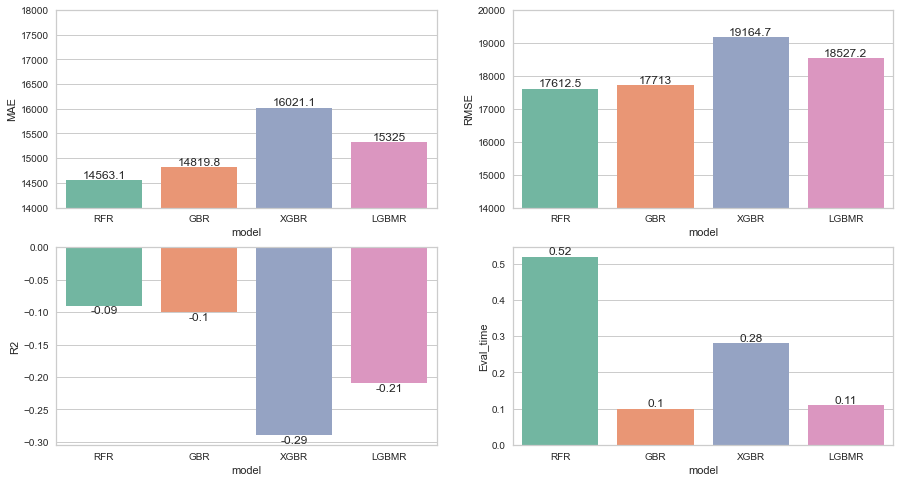

In [66]:
# Evaluation of Regressors (Base Model)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.barplot(data=results_df, x=results_df["model"], y=results_df["MAE"], ax=ax1, palette='Set2')
ax1.set_ylim([14000,18000])
ax1.bar_label(ax1.containers[0])
sns.barplot(data=results_df, x=results_df["model"], y=results_df["RMSE"], ax=ax2, palette='Set2')
ax2.set_ylim([14000,20000])
ax2.bar_label(ax2.containers[0])
sns.barplot(data=results_df, x=results_df["model"], y=results_df["R2"], ax=ax3, palette='Set2')
ax3.bar_label(ax3.containers[0])
sns.barplot(data=results_df, x=results_df["model"], y=results_df["Eval_time"], ax=ax4, palette='Set2')
ax4.bar_label(ax4.containers[0])

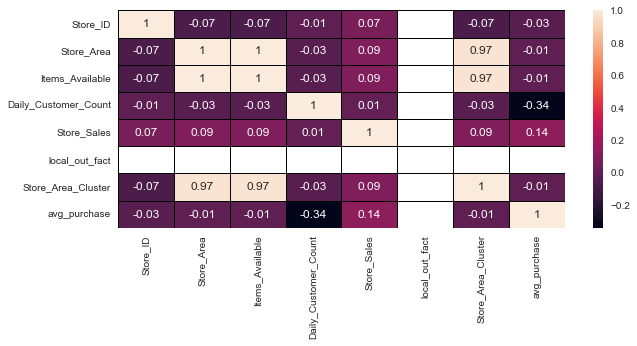

In [67]:
# Creating a heat map of all the numerical features.
plt.figure(figsize=(10,4))
mat = np.round(df2.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black',annot=True);

### Hyperparameter Tuning of Selected Models 

#### Random Forest hyperpameter tuning 

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
%%time
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf_reg = RandomForestRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, 
                               scoring ='neg_root_mean_squared_error',
                               n_iter = 100, cv = kf, verbose=2, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END bootstrap=False, max_depth=1,

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_feature

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, ma

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   0.3s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.2s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_feat

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.0s
CPU times: total: 1min 8s
Wall time: 1min 9s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=0), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [70]:
# the parameters based on random search CV
print("We can use this set of parameters unless we narrow down using GridSearchCV:")
print(rf_random.best_estimator_)
print("The set of scores via RandomSearchCV:")
print(rf_random.best_score_*-1)

We can use this set of parameters unless we narrow down using GridSearchCV:
RandomForestRegressor(bootstrap=False, max_depth=1, max_features='sqrt',
                      min_samples_split=10, n_estimators=40, random_state=0)
The set of scores via RandomSearchCV:
16856.401526107453


In [71]:
# assignment of  the Tunel model 
best_rf_reg = rf_random.best_estimator_
best_rf_reg

RandomForestRegressor(bootstrap=False, max_depth=1, max_features='sqrt',
                      min_samples_split=10, n_estimators=40, random_state=0)

#### Gradient Boosting hyperparameter tuning

In [72]:
# Let's set parameters for GBM

In [73]:
#fix learning rate in gradient boosting model
learning_rate = [0.01, 0.05, 0.1, 0.2 ]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Number of trees in gradient boosting model
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
gb_grid = {'n_estimators': n_estimators,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'learning_rate': learning_rate        
             }
print(gb_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}


In [74]:
%%time
# Use the random grid to search for best hyperparameters

# First create the base model to tune
gb_reg = GradientBoostingRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb_reg, param_distributions = gb_grid, 
                               scoring ='neg_root_mean_squared_error',
                               n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_sam

[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.05, max_dept

[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.01, max_

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.01, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.05, max_depth

[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_

[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8,

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [75]:
# the parameters based on random search CV
print("We can use this set of parameters to narrow down using GridSearchCV in next step:")
print(gb_random.best_estimator_)
print("The set of scores via RandomSearchCV:")
print(gb_random.best_score_*-1)

We can use this set of parameters to narrow down using GridSearchCV in next step:
GradientBoostingRegressor(learning_rate=0.01, max_depth=1, min_samples_split=5,
                          random_state=0)
The set of scores via RandomSearchCV:
16930.42853772976


In [76]:
# assignment of the Tunel model 
best_gb_reg = gb_random.best_estimator_
best_gb_reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, min_samples_split=5,
                          random_state=0)

#### XGBoost hyperparameter tuning

In [77]:
# Let's make model for XGB

In [78]:
# Define the search space
xgb_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.01, 0.05, 0.1, 0.2 ] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": [int(x) for x in np.linspace(1, 10, num = 10)],
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # Number of trees in gradient boosting model
    "n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
}

print(xgb_grid)

{'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 10, 100], 'reg_lambda': [1e-05, 0.01, 0.1, 1, 10, 100], 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [79]:
%%time
# Use the random grid to search for best hyperparameters

# First create the base model to tune
xgb_reg = XGBRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb_reg, param_distributions = xgb_grid,
                                scoring ='neg_root_mean_squared_error',
                                n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=160, reg_alpha=10, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=160, reg_alpha=10, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=160, reg_alpha=10, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=160, reg_alpha=10, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=160, reg_alpha=10, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=1, reg_lambda=100; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=8, n_estimator

[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, n_estimators=120, reg_alpha=100, reg_lambda=1e-05; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.2, max_depth=6, n_estimators=120, reg_alpha=100, reg_lambda=1e-05; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=20, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=20, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=20, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=20, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=20, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[C

[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=1, reg_lambda=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=1, reg_lambda=100; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=1, reg_lambda=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=1, reg_lambda=100; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=120, reg_alpha=0.01, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=120, reg_alpha=0.01, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=120, reg_alpha=0.01, reg_lambda=1; total time=   0.1s
[CV] END cols

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=180, reg_alpha=10, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=180, reg_alpha=10, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=180, reg_alpha=10, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=180, reg_alpha=10, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=180, reg_alpha=10, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=1, n_estimators=140, reg_alpha=0.1, reg_lambda=10; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=1, n_estimators=140, reg_alpha=0.1, reg_lambda=10; total time=   0.0s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=10, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=120, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=120, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=120, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=120, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, n_estimators=120, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.01, max_depth=2, n_estimators=20, reg_alpha=1, reg_lambda=1; total time=   0.0s
[CV] END c

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=1, n_estimators=40, reg_alpha=1e-05, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=1, n_estimators=40, reg_alpha=1e-05, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=1, n_estimators=180, reg_alpha=1e-05, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=1, n_estimators=180, reg_alpha=1e-05, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=1, n_estimators=180, reg_alpha=1e-05, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=1, n_estimators=180, reg_alpha=1e-05, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=1, n_estimators=180, reg_alpha=1e-05, reg_lambda=0.1; to

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=120, reg_alpha=0.1, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=120, reg_alpha=0.1, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=120, reg_alpha=0.1, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=120, reg_alpha=0.1, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=7, n_estimators=160, reg_alpha=0.1, reg_lambda=1e-05; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=7, n_estimators=160, reg_alpha=0.1, reg_lambda=1e-05; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=7, n_estimators=160, reg_alpha=0.1, reg_lambda=1e-05; total ti

[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, n_estimators=180, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, n_estimators=180, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, n_estimators=180, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, n_estimators=180, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=6, n_estimators=180, reg_alpha=0.1, reg_lambda=1; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=40, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=40, reg_alpha=1, reg_lambda=1e-05; total time=   0.0s
[CV] END cols

[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=9, n_estimators=120, reg_alpha=1e-05, reg_lambda=0.01; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=40, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=40, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=40, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=40, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=40, reg_alpha=10, reg_lambda=0.01; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=100, reg_lambda=1; total time=   0.0s
[CV] END 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_const...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                 

In [80]:
# the parameters based on random search CV
print("We can use this set of parameters to narrow down using GridSearchCV in next step:")
print(xgb_random.best_estimator_)
print("The set of scores via RandomSearchCV:")
print(xgb_random.best_score_*-1)

We can use this set of parameters to narrow down using GridSearchCV in next step:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=0.1, ...)
The set of scores via RandomSearchCV:
17003.119408524675


In [81]:
# assignment of the Tunel model 
best_xgb_reg = xgb_random.best_estimator_
best_xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=0.1, ...)

### Light Gradient Boost hyperparameter tuning 

In [82]:
# Let's do model for light GBM

In [83]:
lgbm_grid = {
    'num_leaves':[20,40,60,80,100], 
    'min_child_samples':[5,10,15],
    'max_depth':[int(x) for x in np.linspace(1, 10, num = 10)],
    'learning_rate':[0.01, 0.05, 0.1, 0.2],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100],
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
}

print(lgbm_grid)

{'num_leaves': [20, 40, 60, 80, 100], 'min_child_samples': [5, 10, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 10, 100], 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [84]:
%%time
# Use the random grid to search for best hyperparameters

# First create the base model to tune
lgbm_reg = LGBMRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lgbm_random = RandomizedSearchCV(estimator = lgbm_reg, param_distributions = lgbm_grid, 
                                 scoring ='neg_root_mean_squared_error',
                                 n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
lgbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.05, max_depth=8, min_child_samples=10, n_estimators=140, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=8, min_child_samples=10, n_estimators=140, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=8, min_child_samples=10, n_estimators=140, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=8, min_child_samples=10, n_estimators=140, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=8, min_child_samples=10, n_estimators=140, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_child_samples=15, n_estimators=180, num_leaves=80, reg_alpha=0.1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_child_samples=15, n_estimators=180, num_leaves=80, reg_alpha=0.1; total time=   0.0s
[CV] END learning_rate=0.01, m

[CV] END learning_rate=0.2, max_depth=2, min_child_samples=15, n_estimators=140, num_leaves=60, reg_alpha=0.01; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, min_child_samples=15, n_estimators=140, num_leaves=60, reg_alpha=0.01; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, min_child_samples=15, n_estimators=140, num_leaves=60, reg_alpha=0.01; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, min_child_samples=15, n_estimators=140, num_leaves=60, reg_alpha=0.01; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_samples=5, n_estimators=80, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_samples=5, n_estimators=80, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_samples=5, n_estimators=80, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_samples=5, n_estimators=80, num

[CV] END learning_rate=0.05, max_depth=3, min_child_samples=10, n_estimators=200, num_leaves=100, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_samples=10, n_estimators=200, num_leaves=100, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_samples=10, n_estimators=200, num_leaves=100, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=180, num_leaves=60, reg_alpha=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=180, num_leaves=60, reg_alpha=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=180, num_leaves=60, reg_alpha=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=180, num_leaves=60, reg_alpha=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=1

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=40, num_leaves=100, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=40, num_leaves=100, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=40, num_leaves=100, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=40, num_leaves=100, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=40, num_leaves=100, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, min_child_samples=5, n_estimators=100, num_leaves=80, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, min_child_samples=5, n_estimators=100, num_leaves=80, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, min_child_samples=5, n_estimators=100, num_leav

[CV] END learning_rate=0.01, max_depth=8, min_child_samples=10, n_estimators=200, num_leaves=20, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_samples=5, n_estimators=200, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_samples=5, n_estimators=200, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_samples=5, n_estimators=200, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_samples=5, n_estimators=200, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, min_child_samples=5, n_estimators=200, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_child_samples=5, n_estimators=120, num_leaves=40, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_child_samples=5, n_estimators=120, num_leaves

[CV] END learning_rate=0.01, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=120, num_leaves=60, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=120, num_leaves=60, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, n_estimators=120, nu

[CV] END learning_rate=0.2, max_depth=7, min_child_samples=15, n_estimators=120, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_child_samples=15, n_estimators=120, num_leaves=40, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=140, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=140, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=140, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=140, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=140, num_leaves=40, reg_alpha=1e-05; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=60,

[CV] END learning_rate=0.1, max_depth=2, min_child_samples=5, n_estimators=160, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_child_samples=5, n_estimators=160, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_child_samples=5, n_estimators=160, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_child_samples=5, n_estimators=160, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_child_samples=5, n_estimators=160, num_leaves=20, reg_alpha=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_samples=5, n_estimators=120, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_samples=5, n_estimators=120, num_leaves=60, reg_alpha=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_samples=5, n_estimators=120, num_leaves=60, reg

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMRegressor(random_state=0), n_iter=100,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_samples': [5, 10, 15],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   ver

In [85]:
# the parameters based on random search CV
print("We can use this set of parameters to narrow down using GridSearchCV in next step:")
print(lgbm_random.best_estimator_)
print("The set of scores via RandomSearchCV:")
print(lgbm_random.best_score_*-1)

We can use this set of parameters to narrow down using GridSearchCV in next step:
LGBMRegressor(learning_rate=0.01, max_depth=3, min_child_samples=15,
              n_estimators=40, num_leaves=20, random_state=0, reg_alpha=1)
The set of scores via RandomSearchCV:
16929.096416129596


In [86]:
# assignment of the Tunel model 
best_lgbm_reg = lgbm_random.best_estimator_
best_lgbm_reg

LGBMRegressor(learning_rate=0.01, max_depth=3, min_child_samples=15,
              n_estimators=40, num_leaves=20, random_state=0, reg_alpha=1)

### Evaluation of Tuned Models & Stacking: 

In [87]:
# Define the test models
estimators = [('gb', best_gb_reg),
              ('xgb', best_xgb_reg),
             ('lgbm', best_lgbm_reg)]

stack_reg = StackingRegressor(estimators = estimators, final_estimator = best_lgbm_reg)

In [88]:
# Evaluating Test Model
tuned_results_df = pd.DataFrame()
reg_list = [best_rf_reg, best_gb_reg, best_xgb_reg, best_lgbm_reg, stack_reg]

for best_reg in reg_list:

    start_time = time.time()
    
    best_reg.fit(X_train,y_train)
    y_pred = best_reg.predict(X_test)
    
    end_time = time.time()
    
    # collate score dataframe
    # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
    score_df = pd.DataFrame({'MAE': mean_absolute_error(y_test, y_pred),
                             'MSE': mean_squared_error(y_test, y_pred), 
                             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                             'R2': r2_score(y_test, y_pred),
                             'Eval_time': end_time - start_time,
                            }, 
                             
    tuned_results_df = pd.concat([tuned_results_df, params_df])

tuned_results_df.round(2)

,MAE,MSE,RMSE,R2,Eval_time
RandomForestRegressor,14286.63,2.883568e+08,16981.07,-0.01,0.05
GradientBoostingRegressor,14258.01,2.870832e+08,16943.53,-0.01,0.04
XGBRegressor,14268.54,2.891763e+08,17005.19,-0.02,0.14
LGBMRegressor,14196.74,2.856282e+08,16900.54,-0.00,0.02
StackingRegressor,14198.32,2.854025e+08,16893.86,-0.00,1.28


In [89]:
tuned_model = ["RFR", "GBR", "XGBR", "LGBMR", "StackR"]

tuned_results_df['model'] = tuned_model
tuned_results_df = tuned_results_df.round(2)
tuned_results_df

,MAE,MSE,RMSE,R2,Eval_time,model
RandomForestRegressor,14286.63,2.883568e+08,16981.07,-0.01,0.05,RFR
GradientBoostingRegressor,14258.01,2.870832e+08,16943.53,-0.01,0.04,GBR
XGBRegressor,14268.54,2.891763e+08,17005.19,-0.02,0.14,XGBR
LGBMRegressor,14196.74,2.856282e+08,16900.54,-0.00,0.02,LGBMR
StackingRegressor,14198.32,2.854025e+08,16893.86,-0.00,1.28,StackR


[Text(0, 0, '0.05'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.14'),
 Text(0, 0, '0.02'),
 Text(0, 0, '1.28')]

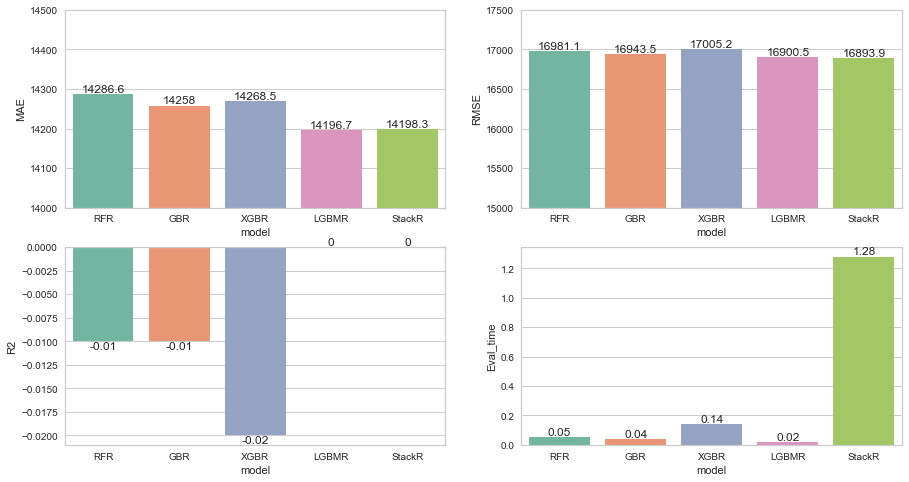

In [90]:
# Evaluation of Regressors (tUNED Model)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.barplot(data=tuned_results_df, x=tuned_results_df["model"], y=tuned_results_df["MAE"], ax=ax1, palette='Set2')
ax1.set_ylim([14000,14500])
ax1.bar_label(ax1.containers[0])
sns.barplot(data=tuned_results_df, x=tuned_results_df["model"], y=tuned_results_df["RMSE"], ax=ax2, palette='Set2')
ax2.set_ylim([15000,17500])
ax2.bar_label(ax2.containers[0])
sns.barplot(data=tuned_results_df, x=tuned_results_df["model"], y=tuned_results_df["R2"], ax=ax3, palette='Set2')
ax3.bar_label(ax3.containers[0])
sns.barplot(data=tuned_results_df, x=tuned_results_df["model"], y=tuned_results_df["Eval_time"], ax=ax4, palette='Set2')
ax4.bar_label(ax4.containers[0])

In [91]:
# The final model chosen is LightGBM due to its Eval time and lowest RMSE as compared to Random Forest

In [92]:
# paramter for lgbm
best_lgbm_reg

LGBMRegressor(learning_rate=0.01, max_depth=3, min_child_samples=15,
              n_estimators=40, num_leaves=20, random_state=0, reg_alpha=1)

In [93]:
# VISUALISATION OF PERFORMANCE METRICS

In [94]:
# Zooming into LightGBM Regressor
best_lgbm_reg.fit(X_train,y_train)
y_pred_lgbm = best_lgbm_reg.predict(X_test)

In [95]:
preds = pd.DataFrame({'y_pred': y_pred_lgbm, 'y_test':y_test['Store_Sales']})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

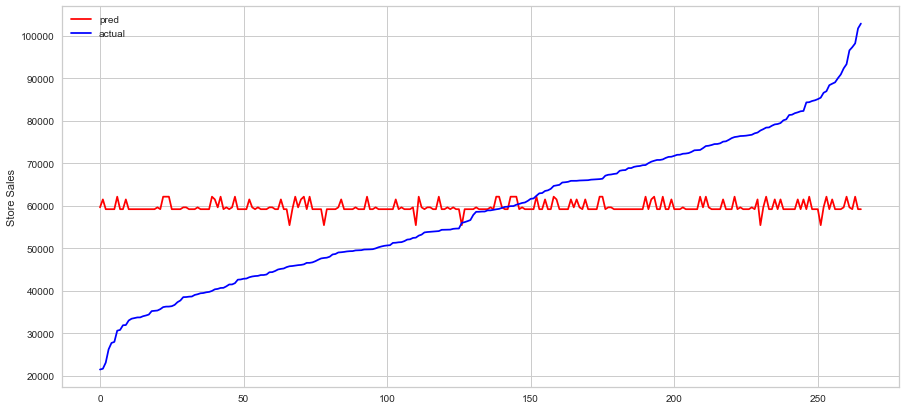

In [96]:
# refer to wine-price-prediction
plt.figure(figsize=[15,7])
plt.plot(preds['y_pred'], label='pred', color = 'Red')
plt.plot(preds['y_test'], label='actual', color = 'Blue')
plt.legend()
plt.ylabel('Store Sales')
plt.show()

### Clustering 

In [97]:
df2.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact,Store_Area_Cluster,avg_purchase
0,1,1659,1961,530,66490,1,7,125.452830
1,2,1461,1752,210,39820,1,4,189.619048
2,3,1340,1609,720,54010,1,2,75.013889
3,4,1451,1748,620,53730,1,4,86.661290
4,5,1770,2111,450,46620,1,8,103.600000


In [ ]:
kmeans_df = df2.drop(["Store_Sales","avg_purchase"], axis=1)
kmeans_df.head(3)

In [99]:
# Normal distribution of Area / Items / Customer / Sales is observed so it's possible to use Clustering.

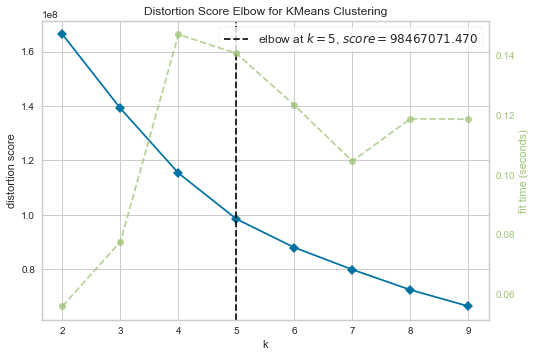

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = Visualizer(
    model, k=(2,10))                   

visualizer.fit(kmeans_df)        # Fit the data to the visualizer 
visualizer.show()        # Finalize and render the figure

In [101]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit_predict(kmeans_df)

array([1, 1, 1, 1, 1, 1, 4, 4, 0, 4, 4, 2, 2, 4, 1, 1, 4, 1, 4, 2, 1, 1,
       2, 1, 4, 2, 4, 4, 1, 1, 4, 4, 2, 4, 2, 1, 4, 2, 1, 4, 0, 1, 2, 0,
       4, 2, 2, 4, 4, 4, 4, 0, 2, 4, 1, 2, 4, 2, 1, 1, 2, 1, 4, 1, 2, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 4, 2, 1, 1, 4, 1, 4, 4, 1, 2, 4, 4,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 4, 0, 2, 4, 4, 4, 0, 2, 2, 1, 4, 4,
       1, 4, 2, 1, 0, 1, 1, 2, 4, 4, 1, 2, 0, 2, 2, 2, 4, 1, 4, 0, 4, 2,
       4, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 4, 1, 0, 4, 2, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 2, 1, 1, 2, 2, 0, 1, 1, 4, 1, 4, 4, 0, 2, 1, 1, 1, 1, 1,
       4, 1, 4, 2, 2, 1, 1, 4, 4, 1, 1, 4, 2, 4, 2, 1, 2, 4, 1, 1, 0, 1,
       4, 4, 0, 4, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       4, 1, 2, 2, 1, 4, 1, 4, 0, 4, 1, 2, 0, 4, 2, 2, 4, 1, 1, 2, 4, 2,
       4, 4, 2, 1, 1, 1, 1, 4, 1, 1, 2, 0, 2, 0, 4, 0, 4, 2, 4, 4, 4, 2,
       4, 1, 0, 2, 4, 1, 4, 4, 2, 4, 2, 1, 0, 1, 4, 4, 2, 0, 1, 1, 4, 2,
       0, 1, 1, 4, 1, 0, 0, 1, 0, 1, 4, 1, 1, 0, 1,

In [102]:
df2['KMeans_Cluster']=kmeans.labels_
df2.head(3)

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,local_out_fact,Store_Area_Cluster,avg_purchase,KMeans_Cluster
0,1,1659,1961,530,66490,1,7,125.452830,1
1,2,1461,1752,210,39820,1,4,189.619048,1
2,3,1340,1609,720,54010,1,2,75.013889,1


Text(0.5, 1.0, 'Scatterplot using Kmeans Clusters = 5')

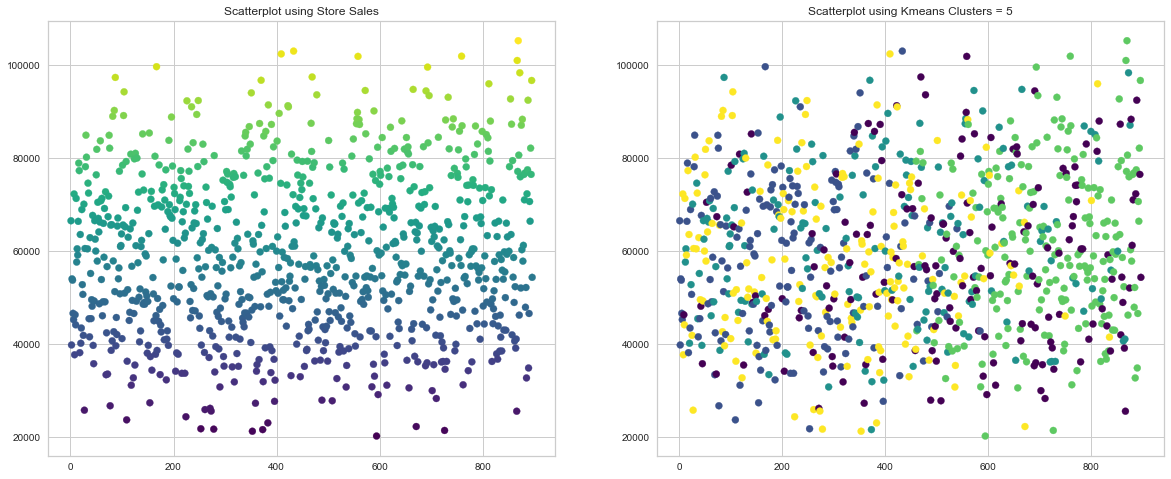

In [103]:
# Scatterplot before & after Clustering

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
fig.subplots_adjust(wspace=0.2)

# Original Scatterplot
X = df2[['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count']].values
y = df2[['Store_Sales']].values
ax1.scatter(X[:, 0], y, c = y, cmap = 'viridis')
ax1.set_title("Scatterplot using Store Sales")

# amended Scatterplot
X_kmeans = df2[['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count', 'KMeans_Cluster']].values
y_kmeans = df2[['Store_Sales']].values
ax2.scatter(X_kmeans[:, 0], y_kmeans, c = df2['KMeans_Cluster'], cmap = 'viridis')
ax2.set_title("Scatterplot using Kmeans Clusters = 5")

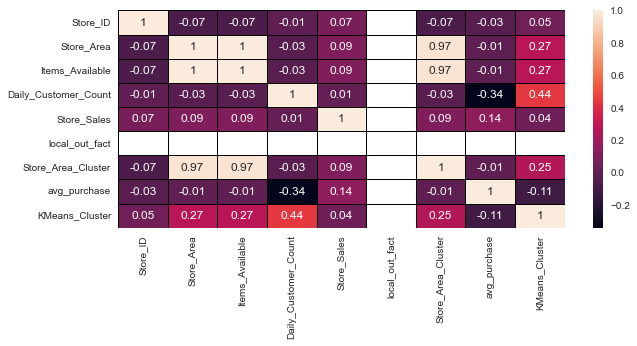

In [104]:
# Creating a heat map of all the numerical features.
plt.figure(figsize=(10,4))
mat = np.round(df2.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black',annot=True);

### Modelling with Clustering 

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 895
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_ID              884 non-null    int64  
 1   Store_Area            884 non-null    int64  
 2   Items_Available       884 non-null    int64  
 3   Daily_Customer_Count  884 non-null    int64  
 4   Store_Sales           884 non-null    int64  
 5   local_out_fact        884 non-null    int32  
 6   Store_Area_Cluster    884 non-null    int32  
 7   avg_purchase          884 non-null    float64
 8   KMeans_Cluster        884 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 58.7 KB


In [106]:
X = df2.drop(['Store_Sales', 'avg_purchase'], axis=1)
y = df2[['Store_Sales']]

In [107]:
feature_name = X.columns
feature_name

Index(['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'local_out_fact', 'Store_Area_Cluster', 'KMeans_Cluster'],
      dtype='object')

In [108]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= seed, shuffle=True)

In [109]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state= seed, shuffle=True)

In [110]:
# Standardise data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
# Evaluating Test Model
results_clustered_df = pd.DataFrame()
reg_list = [rf_reg, gb_reg, xgb_reg, lgbm_reg]

for reg in reg_list:

    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    
    start_time = time.time()
    
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    
    end_time = time.time()
    
    # collate score dataframe
    # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
    score_df = pd.DataFrame({'MAE': mean_absolute_error(y_test, y_pred),
                             'MSE': mean_squared_error(y_test, y_pred), 
                             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                             'R2': r2_score(y_test, y_pred),
                             'Eval_time': end_time - start_time,
                            }, 
                         
    results_clustered_df = pd.concat([results_clustered_df, params_df])

results_clustered_df.round(2)

,MAE,MSE,RMSE,R2,Eval_time
RandomForestRegressor,14452.27,3.101162e+08,17610.12,-0.09,0.22
GradientBoostingRegressor,14631.18,3.081786e+08,17555.02,-0.08,0.06
XGBRegressor,16209.80,3.830109e+08,19570.67,-0.35,0.12
LGBMRegressor,15143.64,3.339537e+08,18274.40,-0.17,0.04


In [112]:
model = ["RFR", "GBR", "XGBR", "LGBMR"]

results_clustered_df['model'] = model
results_clustered_df = results_clustered_df.round(2)
results_clustered_df

,MAE,MSE,RMSE,R2,Eval_time,model
RandomForestRegressor,14452.27,3.101162e+08,17610.12,-0.09,0.22,RFR
GradientBoostingRegressor,14631.18,3.081786e+08,17555.02,-0.08,0.06,GBR
XGBRegressor,16209.80,3.830109e+08,19570.67,-0.35,0.12,XGBR
LGBMRegressor,15143.64,3.339537e+08,18274.40,-0.17,0.04,LGBMR


[Text(0, 0, '0.22'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.12'),
 Text(0, 0, '0.04')]

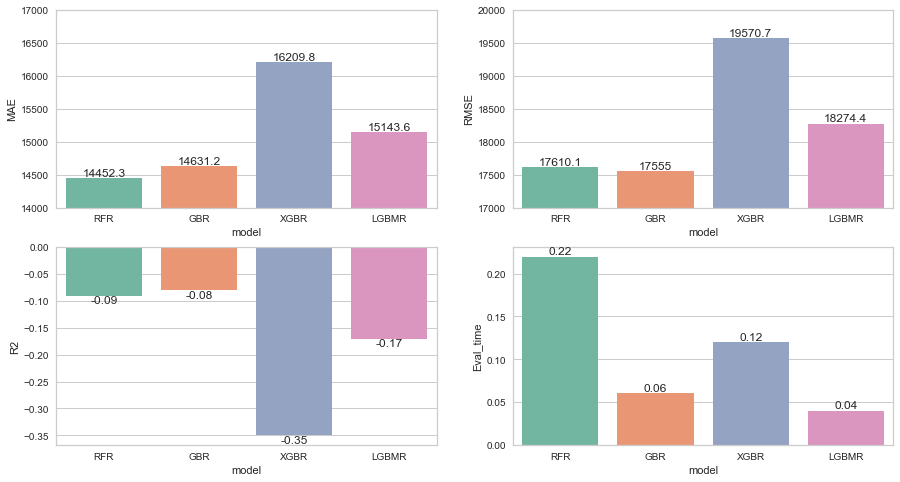

In [113]:
# Evaluation of Regressors (Base Model)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.barplot(data=results_clustered_df, x=results_clustered_df["model"], y=results_clustered_df["MAE"], ax=ax1, palette='Set2')
ax1.set_ylim([14000,17000])
ax1.bar_label(ax1.containers[0])
sns.barplot(data=results_clustered_df, x=results_clustered_df["model"], y=results_clustered_df["RMSE"], ax=ax2, palette='Set2')
ax2.set_ylim([17000,20000])
ax2.bar_label(ax2.containers[0])
sns.barplot(data=results_clustered_df, x=results_clustered_df["model"], y=results_clustered_df["R2"], ax=ax3, palette='Set2')
ax3.bar_label(ax3.containers[0])
sns.barplot(data=results_clustered_df, x=results_clustered_df["model"], y=results_clustered_df["Eval_time"], ax=ax4, palette='Set2')
ax4.bar_label(ax4.containers[0])